# Desafio realizado por Cristobal Novoa

# Desafío - Expansiones basales

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Expansiones basales.

# Descripción

● Una aplicación interesante de los modelos predictivos es poder predecir propiedades de
materiales compuestos a partir de diferentes combinaciones en el proceso y creación
de estos.

● Para este desafío trabajaremos con un dataset que contiene diferentes medidas de
materiales con los que se hace la mezcla de concreto.

● Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas
compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan
reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

# Ejercicio 1: Preparar el ambiente de trabajo

● Importe los módulos clásicos del trabajo en ciencia de datos.

● El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere
estadísticas descriptivas.

● En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las
medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería
pyGAM.

In [2]:
# Se importan librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
from pygam import LinearGAM, s, f
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error

In [3]:
# Se carga csv y muestran filas y columnas
df = pd.read_csv('compresive_strength_concrete.csv')
df.shape

(1030, 9)

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Se revisa si hay valores nulos dentro del csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Estadisticas descriptivas

In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Ejercicio 2: Descripción

● El vector objetivo tiene el nombre de Concrete compressive strength(MPa,
megapascals)

● Los nombres de las variables son muy poco amigables, dado que contienen espacios,
paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga)
renombrar las variables o acceder a éstas mediante notación de índice iloc.

● Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos.

In [7]:
#Se observan nombres de las columnas para recodificar
df.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [8]:
#Se renombran las variables 
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'cement_density',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_density', 
                        'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash_density',
                        'Water  (component 4)(kg in a m^3 mixture)': 'water_density',
                        'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer_density',
                        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate_density',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate_density',
                        'Age (day)': 'age_day',
                        'Concrete compressive strength(MPa, megapascals) ': 'concrete_compressive_streng_Mpa'})

In [9]:
#Se comprueba la correcta recodificacion
df.columns

Index(['cement_density', 'blast_furnace_density', 'fly_ash_density',
       'water_density', 'superplasticizer_density', 'coarse_aggregate_density',
       'fine_aggregate_density', 'age_day', 'concrete_compressive_streng_Mpa'],
      dtype='object')

In [10]:
df.head()

,cement_density,blast_furnace_density,fly_ash_density,water_density,superplasticizer_density,coarse_aggregate_density,fine_aggregate_density,age_day,concrete_compressive_streng_Mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
lista_vars = df.columns.tolist()

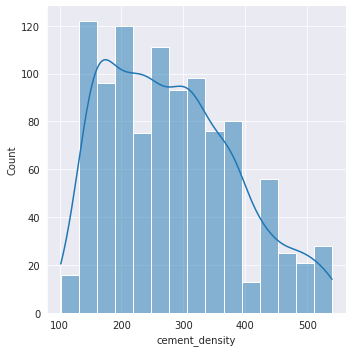

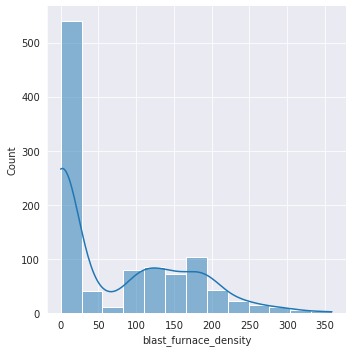

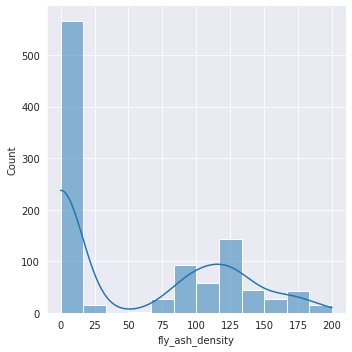

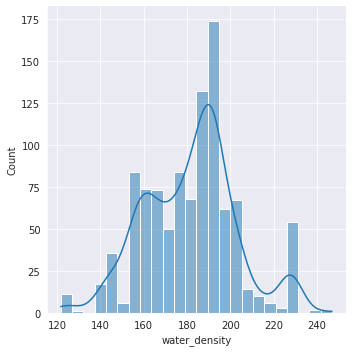

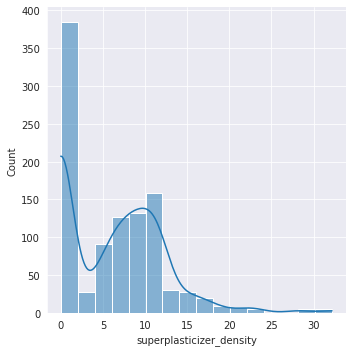

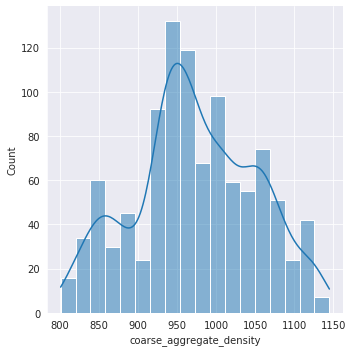

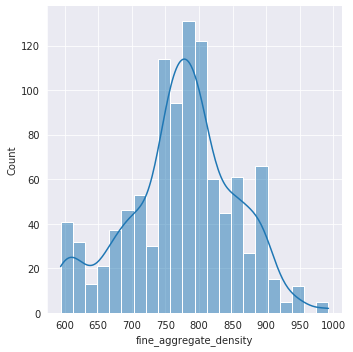

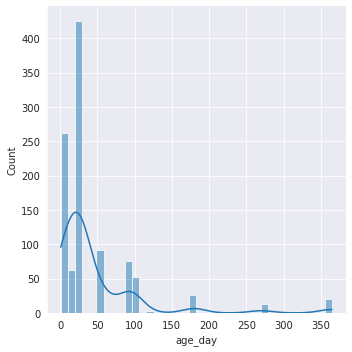

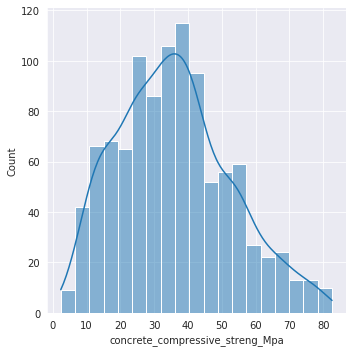

In [12]:
#Se generan los displot para las variables del dataframe
for i in lista_vars:
    sns.displot(data = df, x = i, kde = True)
    plt.show()

Las variables son de naturaleza continua y, en su mayoria, las variables tienen distribuciones que se asemejan a la distribucion normal.
Se procedera a estandarizar las variables debido a la sensibilidad del algoritmo.

# Heatmap

Text(0.5, 1, 'Heatmap correlaciones > 0.6\n')

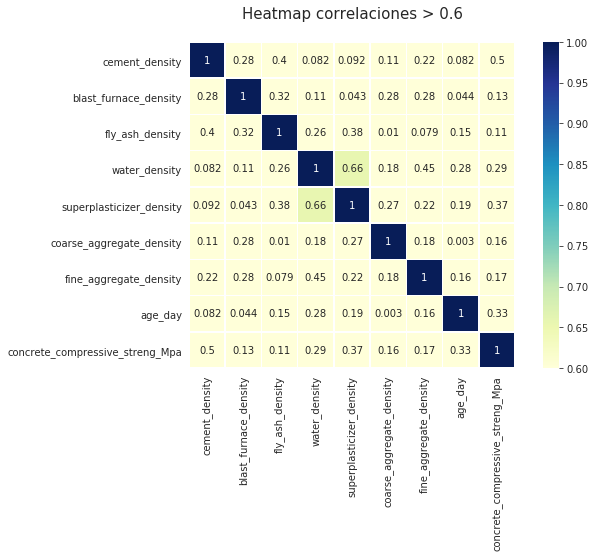

In [13]:
# Se genera heatmap para ver las correlaciones absolutas entre variables que sean superiores a 0.6
corr_mat = abs(df.corr())
sns.heatmap(corr_mat, cmap="YlGnBu", annot=True,linewidths=.5, square=True, vmin=0.6)
plt.title('Heatmap correlaciones > 0.6\n', fontsize = 15)

El mayor valor de correlacion se da entre los atributos superplasticizer_density y water_density

# Ejercicio 3: Modelo

● En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional a
esto, importe las métricas de desempeño asociadas.

● Genere conjuntos de entrenamiento y validación.

● Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper
parámetro lam así como las métricas de desempeño asociadas.

● Genere un segundo modelo implementando gridsearch en lambda con un logspace
entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [14]:
df.columns

Index(['cement_density', 'blast_furnace_density', 'fly_ash_density',
       'water_density', 'superplasticizer_density', 'coarse_aggregate_density',
       'fine_aggregate_density', 'age_day', 'concrete_compressive_streng_Mpa'],
      dtype='object')

In [15]:
#Se genera objeto sub para posteriormente separar las muestras
sub = df.drop(['concrete_compressive_streng_Mpa'], axis=1)

In [16]:
# X será nuestro conjunto de atributos e y será nuestra variable objetivo
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete_compressive_streng_Mpa'], test_size =.3, random_state = 63)
# Ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)
# Con el estandarizador ajustado sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
# Transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)

# LinearGAM sin Gridsearch

In [17]:
#Se genera primer modelo 
gam = LinearGAM().fit(X_train, y_train)

In [18]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.0475
Link Function:                     IdentityLink Log Likelihood:                                 -3068.8229
Number of Samples:                          721 AIC:                                             6299.7409
                                                AICc:                                            6320.5554
                                                GCV:                                               34.5198
                                                Scale:                                             27.6979
                                                Pseudo R-Squared:                                   0.9138
Feature Function                  Lam

In [19]:
#Se genera funcion para reportar las metricas de desempeño
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))
    print('Valor del parámetro lambda: {0}'.format(model.lam[0]))

In [20]:
#Se reportan metricas del primer modelo
report_gam_metrics(gam, X_test, y_test)

Test R^2: 0.894
Test RMSE: 5.265
Test Median Absolute Error: 3.763
Valor del parámetro lambda: [0.6]


# LinearGAM con Gridsearch

In [ ]:
#Se usa logspace indicado y se genera modelo linearGAM con gridsearch
lams = np.logspace(-3, 3)
gam_grid = gam.gridsearch(X_train, y_train, lam=lams)
gam_grid.summary()

 76% (38 of 50) |##################      | Elapsed Time: 0:00:05 ETA:   0:00:01

In [21]:
#Se reportan las metricas del modelo LinearGAM con gridsearch
report_gam_metrics(gam_grid, X_test, y_test)

Test R^2: 0.896
Test RMSE: 5.205
Test Median Absolute Error: 3.53
Valor del parámetro lambda: [0.1206792640639329]


## El mejor modelo de acuerdo al Rcuadrado y al RMSE es el modelo GAM con Gridsearch con un desempeño ligeramente superior. 

# Ejercicio 4: Dependencia Parcial

● En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada
atributo.

● Para ello, genere una función que tenga como argumento de entrada el modelo
estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

● Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles
de resistencia.

In [22]:
#Se genera funcion que devuelve grilla con todos los graficos de dependencia parcial
def dep_part(mod_est):
    fig, axs = plt.subplots(2,4, figsize = (20,6)); titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = mod_est.generate_X_grid(term=i)
        ax.plot(XX[:, i], mod_est.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], mod_est.partial_dependence(term=i, X=XX,width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]],[0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])

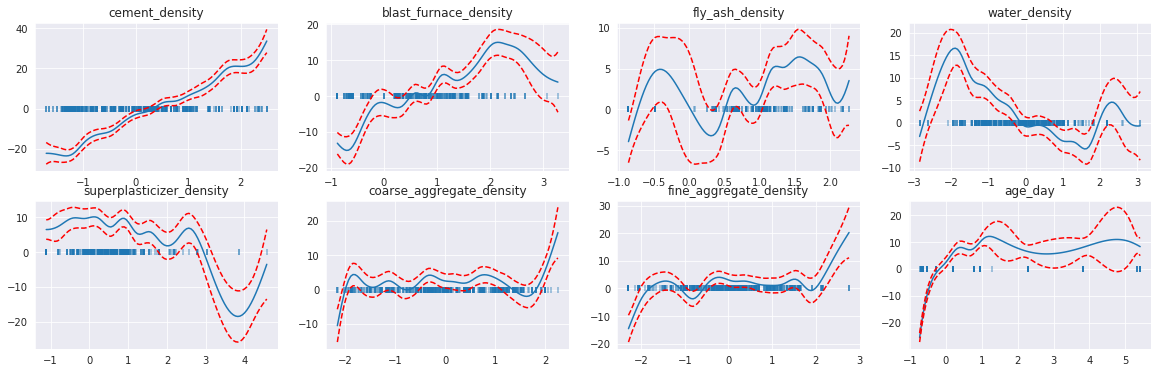

In [23]:
dep_part(gam_grid)

El atributo que esta asociado a un mayor nivel de resistencia es cement_density, cuyo comportamiento es bastante lineal, considerando la lógica de que a mayor densidad del cemento se incrementa la resistencia de este.
Lo mismo podría decirse de blast_furnace_density y age_day que exhiben un comportamiento casi directamente proporcional a la resistencia. En el caso de water_density se observa el comportamiento inverso, lo que tiene sentido cuando se sabe que mayores niveles de agua estan asociados a una menor resistencia del cemento en una etapa inicial. 

Atributos como fly_ash_density, superplasticizer_density, coarse_aggregate_density y fine_aggregatte_density tienen comportamientos erraticos y poco explicativos de la resistencia del cemento. Esto tambien puede verse en el Heatmap de correlaciones. 

En el caso de superplasticizer_density, este comportamiento se puede asociar a la falta de data en ciertos sectores.   
